<a href="https://colab.research.google.com/github/armandossrecife/my_evaluation/blob/main/revisar_experimentos_kafka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Kafka Dataset

**Review Apache Kafka Dataset generated by ATDCodeAnalyser experiment**

## Prepara ambiente

In [1]:
!rm -rf /content/kafka

In [2]:
!git clone https://github.com/apache/kafka.git

Cloning into 'kafka'...
remote: Enumerating objects: 372681, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 372681 (delta 15), reused 40 (delta 7), pack-reused 372594
Receiving objects: 100% (372681/372681), 176.35 MiB | 12.41 MiB/s, done.
Resolving deltas: 100% (179815/179815), done.


In [3]:
!pip3 install pydriller

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00


In [4]:
!wget https://github.com/armandossrecife/my_evaluation/raw/main/kafka/top20classeskafka2.xlsx

--2024-03-23 13:44:55--  https://github.com/armandossrecife/my_evaluation/raw/main/kafka/top20classeskafka2.xlsx
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/armandossrecife/my_evaluation/main/kafka/top20classeskafka2.xlsx [following]
--2024-03-23 13:44:55--  https://raw.githubusercontent.com/armandossrecife/my_evaluation/main/kafka/top20classeskafka2.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6429 (6.3K) [application/octet-stream]
Saving to: ‘top20classeskafka2.xlsx’

top20classeskafka2. 100%[===================>]   6.28K  --.-KB/s    in 0s      

2024-03-23 13:44:55 (57.4 MB/s) - 

## Funções de Apoio

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Create the boxplot
def generate_boxsplot(coluna, my_title, xlabel, ylabel, outliers=True):
  plt.figure(figsize=(10, 6))
  plt.boxplot(coluna, showfliers=outliers)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(my_title)
  plt.grid(True)
  plt.show()

def clean_and_format_df(df_original):
  df = df_original.copy()
  # Handle missing values (if any) in the 'time_resolution' column
  df.dropna(subset=['time_resolution'], inplace=True)
  # Extract the numeric part (assuming format "X days")
  df['time_resolution_days'] = df['time_resolution'].str.extract('(\d+)').astype(int)

  return df

import re

def extract_kafka_id(text):
  """
  This function extracts the pattern KAFKA- followed by any digits from a text string.

  Args:
      text: The text string to search.

  Returns:
      A string containing the extracted ID (e.g., "KAFKA-123") or None if not found.
  """
  my_match = re.search(r"KAFKA-(\d+)", text)
  if my_match:
    return my_match.group(0)  # Return the entire matched string
  else:
    return None


def get_issue_id_by_commit(df, my_hash):
  resultado_linha = df[df['commit']==my_hash].issue_id
  index = resultado_linha.index[0]
  resultado = resultado_linha[index]
  return resultado

## 1. Issues in commits with critical files

Lista de issues que aparecem nas mensagens dos commits com classes críticas

In [7]:
url_file2 = "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/kafka/kafka_issues_in_commits_with_critical_classes.xlsx"
df_kafka_issues_in_commits_arquivos_criticos = pd.read_excel(url_file2)
df_kafka_issues_in_commits_arquivos_criticos

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution
0,KAFKA-1286,Sub-task,Resolved,Retry Can Block,2014-03-01,2014-03-05,4 days
1,KAFKA-1261,Sub-task,Resolved,Make metadata refresh configurable,2014-02-12,2014-02-13,1 days
2,KAFKA-1260,Sub-task,Closed,Integration Test for New Producer Part II: Bro...,2014-02-12,2014-02-27,15 days
3,KAFKA-1253,Sub-task,Resolved,Implement compression in new producer,2014-02-10,2014-03-27,45 days
4,KAFKA-1252,Sub-task,Resolved,Implement re-tries in new producer,2014-02-10,2014-02-21,11 days
...,...,...,...,...,...,...,...
934,KAFKA-15485,Improvement,Resolved,Support building with Java 21 (LTS release),2023-09-22,2023-09-25,3 days
935,KAFKA-15429,Bug,Resolved,Kafka Streams attempts to commit on a closed p...,2023-09-02,2023-09-03,1 days
936,KAFKA-15326,Improvement,Resolved,Decouple Processing Thread from Polling Thread,2023-08-09,2023-11-02,85 days
937,KAFKA-15306,Sub-task,Resolved,Integrate committed offsets logic when updatin...,2023-08-04,2023-09-18,45 days


In [8]:
# Faz a limpeza e formatação dos dados
df_issues2 = clean_and_format_df(df_original=df_kafka_issues_in_commits_arquivos_criticos)
df_issues2

,issue_key,issue_type,status,summary,created_date,resolved_date,time_resolution,time_resolution_days
0,KAFKA-1286,Sub-task,Resolved,Retry Can Block,2014-03-01,2014-03-05,4 days,4
1,KAFKA-1261,Sub-task,Resolved,Make metadata refresh configurable,2014-02-12,2014-02-13,1 days,1
2,KAFKA-1260,Sub-task,Closed,Integration Test for New Producer Part II: Bro...,2014-02-12,2014-02-27,15 days,15
3,KAFKA-1253,Sub-task,Resolved,Implement compression in new producer,2014-02-10,2014-03-27,45 days,45
4,KAFKA-1252,Sub-task,Resolved,Implement re-tries in new producer,2014-02-10,2014-02-21,11 days,11
...,...,...,...,...,...,...,...,...
934,KAFKA-15485,Improvement,Resolved,Support building with Java 21 (LTS release),2023-09-22,2023-09-25,3 days,3
935,KAFKA-15429,Bug,Resolved,Kafka Streams attempts to commit on a closed p...,2023-09-02,2023-09-03,1 days,1
936,KAFKA-15326,Improvement,Resolved,Decouple Processing Thread from Polling Thread,2023-08-09,2023-11-02,85 days,85
937,KAFKA-15306,Sub-task,Resolved,Integrate committed offsets logic when updatin...,2023-08-04,2023-09-18,45 days,45


## 2. Commits with critical files

Lista de commits com as classes críticas

In [9]:
url_file5 = "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/kafka/kafka_commits_with_critical_classes.xlsx"
df_kafka_commits_arquivos_criticos = pd.read_excel(url_file5)
df_kafka_commits_arquivos_criticos['commit'] = df_kafka_commits_arquivos_criticos['hash']
df_kafka_commits_arquivos_criticos

,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,commit
0,269d16d3c915d09f650ae32aa81542bd8522ca68,KAFKA-1227 New producer!,28/1/2014,11720,121,['KafkaProducer.java'],"['build.sbt', 'BufferExhaustedException.java',...","[{'KafkaProducer.java': '@@ -0,0 +1,240 @@\n+p...","['@@ -0,0 +1,11 @@\n+import sbt._\n+import Key...",269d16d3c915d09f650ae32aa81542bd8522ca68
1,253f86e31062fb86401abdc13835c251eef47417,Implement a few of the API suggestions from th...,4/2/2014,1293,38,['KafkaProducer.java'],"['Callback.java', 'DefaultPartitioner.java', '...","[{'KafkaProducer.java': '@@ -6,17 +6,22 @@ imp...","['@@ -2,14 +2,17 @@ package kafka.clients.prod...",253f86e31062fb86401abdc13835c251eef47417
2,fa6339c19cd06880d32ec9a5ee6b66e7f1488dcf,Rename client package from kafka.* to org.apac...,6/2/2014,803,116,['KafkaProducer.java'],"['BufferExhaustedException.java', 'Callback.ja...","[{'KafkaProducer.java': '@@ -1,4 +1,4 @@\n-pac...","['@@ -1,6 +1,6 @@\n-package kafka.clients.prod...",fa6339c19cd06880d32ec9a5ee6b66e7f1488dcf
3,36eae8f63c81f8d38c2351054c15bf7d5eb612d9,trivial fix to add missing license header usin...,7/2/2014,2020,125,['KafkaProducer.java'],"['HEADER', 'BufferExhaustedException.java', 'C...","[{'KafkaProducer.java': '@@ -1,3 +1,19 @@\n+/*...","['@@ -1,16 +1,14 @@\n-Licensed to the Apache S...",36eae8f63c81f8d38c2351054c15bf7d5eb612d9
4,7e154a36f74ad0ea7e0f6d48b71a5a73d99330e7,KAFKA-1261 Make it possible to configure the m...,13/2/2014,67,2,['KafkaProducer.java'],"['KafkaProducer.java', 'ProducerConfig.java']","[{'KafkaProducer.java': '@@ -1,18 +1,14 @@\n /...","['@@ -1,18 +1,14 @@\n /**\n- * Licensed to the...",7e154a36f74ad0ea7e0f6d48b71a5a73d99330e7
...,...,...,...,...,...,...,...,...,...,...
1447,9e5ca8416de6011fa8c0d63430e9b89fe751ee2b,MINOR: Fix kafka-site formatting (#14419)\n\nR...,21/9/2023,2,1,['StreamsConfig.java'],['StreamsConfig.java'],"[{'StreamsConfig.java': '@@ -777,7 +777,7 @@ p...","['@@ -777,7 +777,7 @@ public class StreamsConf...",9e5ca8416de6011fa8c0d63430e9b89fe751ee2b
1448,98febb989abd1bdb624420f21122c477f2614a08,"KAFKA-15485: Fix ""this-escape"" compiler warnin...",24/9/2023,159,83,"['KafkaProducer.java', 'KafkaStreams.java', 'S...","['AbstractCoordinator.java', 'DefaultBackgroun...","[{'KafkaProducer.java': '@@ -333,7 +333,7 @@ p...","['@@ -1291,7 +1291,7 @@ public abstract class ...",98febb989abd1bdb624420f21122c477f2614a08
1449,65efb981347d6f81fb2713cd27cdfdfa9d8781b9,KAFKA-10199: Do not process when in PARTITIONS...,26/9/2023,97,2,['StreamThread.java'],"['StreamThread.java', 'StreamThreadTest.java']","[{'StreamThread.java': '@@ -260,6 +260,12 @@ p...","['@@ -260,6 +260,12 @@ public class StreamThre...",65efb981347d6f81fb2713cd27cdfdfa9d8781b9
1450,079e5d647ce39cf2ab5b5f37c5ce28b59fb6db13,KAFKA-15326: [8/N] Move consumer interaction o...,26/9/2023,320,14,"['StreamTask.java', 'StreamThread.java']","['PartitionGroup.java', 'ReadOnlyTask.java', '...","[{'StreamTask.java': '@@ -84,6 +84,7 @@ public...","['@@ -70,6 +70,7 @@ public class PartitionGrou...",079e5d647ce39cf2ab5b5f37c5ce28b59fb6db13


## 3. Commits with issues with architectural impact

Lista de commits com issues com impacto arquitetural

In [10]:
url_file4 = "https://github.com/Technical-Debt-Large-Scale/my_validation/raw/main/kafka/kafka_commits_issues_yes_ai_satd.xlsx"
df_kafka_commits_issues_yes_ai_satd = pd.read_excel(url_file4)
df_kafka_commits_issues_yes_ai_satd

,commits,msg,lines,files,comments
0,466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253 Compression in the new producer; re...,545,19,"['exception', 'header', 'constructor', 'constr..."
1,99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123: add callback in commit api and use...,3334,33,"['interface', 'handling', 'exception', 'API', ..."
2,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727: Topology partial construction\n\ng...,256,9,['test']
3,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117: handle metadata updates during con...,146,6,"['update', 'update', 'update', 'update', 'upda..."
4,86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776: Unify store and downstream caching...,5672,105,"['update', 'update', 'update', 'interface']"
5,d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063; Bound fetch response size (KIP-74)...,2394,48,"['more efficient', 'more efficient', 'construc..."
6,3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066; Use client-side FetchRequest/Fetch...,3264,120,"['header', 'header', 'API', 'header', 'header'..."
7,e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703; Graceful close for consumers and p...,379,9,"['implementation', 'exception', 'exception', '..."
8,7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724: Clean up of state directories can ...,119,14,"['cleanup', 'clean']"
9,f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059: Implement Transactional Coordinato...,4894,58,"['TODO', 'test', 'update', 'update', 'update',..."


In [11]:
# Apply extract_cassandra_id function to 'my_text' column and add a new column
df_kafka_commits_issues_yes_ai_satd['issue_id'] = df_kafka_commits_issues_yes_ai_satd['msg'].apply(extract_kafka_id)
df_kafka_commits_issues_yes_ai_satd['commit'] =  df_kafka_commits_issues_yes_ai_satd['commits']

## 4. Relação Commits, Classes Críticas, Issues_id

In [12]:
df_teste = df_kafka_commits_arquivos_criticos[df_kafka_commits_arquivos_criticos['commit'].isin(df_kafka_commits_issues_yes_ai_satd.commit.to_list())]
df_teste

,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,commit
9,466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253 Compression in the new producer; re...,26/3/2014,545,19,['KafkaProducer.java'],"['build.gradle', 'KafkaProducer.java', 'Produc...","[{'KafkaProducer.java': '@@ -69,6 +69,7 @@ pub...","['@@ -151,7 +151,6 @@ project(\':core\') {\n ...",466a83b78c2bfcb9ac3116748394e7845a99bf7a
52,99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123: add callback in commit api and use...,15/7/2015,3334,33,"['KafkaConsumer.java', 'Fetcher.java']","['Consumer.java', 'ConsumerCommitCallback.java...","[{'KafkaConsumer.java': '@@ -15,9 +15,10 @@ pa...","['@@ -63,11 +63,21 @@ public interface Consume...",99c0686be2141a0fffe1c55e279370a87ef8c1ea
114,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727: Topology partial construction\n\ng...,4/11/2015,256,9,['StreamThread.java'],"['TopologyBuilder.java', 'StreamThread.java', ...","[{'StreamThread.java': '@@ -418,7 +418,9 @@ pu...","['@@ -63,18 +63,23 @@ public class TopologyBui...",421de0a3f93f8d21f7ca0f1287a4305c00edaa08
229,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117: handle metadata updates during con...,20/4/2016,146,6,['ConsumerCoordinator.java'],"['Metadata.java', 'AbstractCoordinator.java', ...","[{'ConsumerCoordinator.java': '@@ -63,7 +63,6 ...","['@@ -107,6 +107,14 @@ public final class Meta...",8a863ecee7e5dcdaf66a55b91040a7893ffdbf66
295,86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776: Unify store and downstream caching...,16/9/2016,5672,105,"['StreamsConfig.java', 'KStreamImpl.java', 'St...","['StreamsConfig.java', 'JoinWindows.java', 'Ti...","[{'StreamsConfig.java': '@@ -136,6 +136,9 @@ p...","['@@ -136,6 +136,9 @@ public class StreamsConf...",86aa0eb0f274c6e44eb190ce250433419e011a67
297,d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063; Bound fetch response size (KIP-74)...,18/9/2016,2394,48,"['KafkaConsumer.java', 'Fetcher.java']","['ConsumerConfig.java', 'KafkaConsumer.java', ...","[{'KafkaConsumer.java': '@@ -672,6 +672,7 @@ p...","['@@ -112,6 +112,17 @@ public class ConsumerCo...",d04b0998c043a6a430921585ffd4c42572a3bf5a
332,3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066; Use client-side FetchRequest/Fetch...,14/11/2016,3264,120,"['ConsumerCoordinator.java', 'Fetcher.java']","['import-control.xml', 'ClientRequest.java', '...","[{'ConsumerCoordinator.java': '@@ -12,7 +12,6 ...","['@@ -81,11 +81,13 @@\n <subpackage name=""...",3b4c347949c02b1e2b1dd473deda0f8d2304d027
334,e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703; Graceful close for consumers and p...,19/11/2016,379,9,['ConsumerCoordinator.java'],"['ConsumerCoordinator.java', 'KafkaChannel.jav...","[{'ConsumerCoordinator.java': '@@ -63,6 +63,8 ...","['@@ -63,6 +63,8 @@ public final class Consume...",e53babab9cada20cc54a18c0fd63aa5ab84fd012
389,7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724: Clean up of state directories can ...,6/2/2017,119,14,"['KafkaStreams.java', 'StreamsConfig.java', 'S...","['KafkaStreams.java', 'StreamsConfig.java', 'S...","[{'KafkaStreams.java': '@@ -339,7 +339,7 @@ pu...","['@@ -339,7 +339,7 @@ public class KafkaStream...",7de22453bbd05a7ac629543e09626ac6987ce306
446,f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059: Implement Transactional Coordinato...,26/4/2017,4894,58,['Fetcher.java'],"['import-control-core.xml', 'Fetcher.java', 'C...","[{'Fetcher.java': '@@ -868,7 +868,13 @@ public...","['@@ -61,6 +61,10 @@\n <allow pkg=""org.apa...",f69d94158ce72f4ef2df5b98f2395c2b2e61251e


In [13]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 9 to 1443
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   hash                       53 non-null     object
 1   msg                        53 non-null     object
 2   date                       53 non-null     object
 3   lines                      53 non-null     int64 
 4   files                      53 non-null     int64 
 5   critical_files             53 non-null     object
 6   modified_files             53 non-null     object
 7   diff_files                 53 non-null     object
 8   diff_files_modified_files  53 non-null     object
 9   commit                     53 non-null     object
dtypes: int64(2), object(8)
memory usage: 6.6+ KB


In [14]:
df_teste['issue_id'] = df_teste['msg'].apply(extract_kafka_id)
df_teste

<ipython-input-14-5ca5f2e946a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['issue_id'] = df_teste['msg'].apply(extract_kafka_id)


,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,commit,issue_id
9,466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253 Compression in the new producer; re...,26/3/2014,545,19,['KafkaProducer.java'],"['build.gradle', 'KafkaProducer.java', 'Produc...","[{'KafkaProducer.java': '@@ -69,6 +69,7 @@ pub...","['@@ -151,7 +151,6 @@ project(\':core\') {\n ...",466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253
52,99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123: add callback in commit api and use...,15/7/2015,3334,33,"['KafkaConsumer.java', 'Fetcher.java']","['Consumer.java', 'ConsumerCommitCallback.java...","[{'KafkaConsumer.java': '@@ -15,9 +15,10 @@ pa...","['@@ -63,11 +63,21 @@ public interface Consume...",99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123
114,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727: Topology partial construction\n\ng...,4/11/2015,256,9,['StreamThread.java'],"['TopologyBuilder.java', 'StreamThread.java', ...","[{'StreamThread.java': '@@ -418,7 +418,9 @@ pu...","['@@ -63,18 +63,23 @@ public class TopologyBui...",421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727
229,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117: handle metadata updates during con...,20/4/2016,146,6,['ConsumerCoordinator.java'],"['Metadata.java', 'AbstractCoordinator.java', ...","[{'ConsumerCoordinator.java': '@@ -63,7 +63,6 ...","['@@ -107,6 +107,14 @@ public final class Meta...",8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117
295,86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776: Unify store and downstream caching...,16/9/2016,5672,105,"['StreamsConfig.java', 'KStreamImpl.java', 'St...","['StreamsConfig.java', 'JoinWindows.java', 'Ti...","[{'StreamsConfig.java': '@@ -136,6 +136,9 @@ p...","['@@ -136,6 +136,9 @@ public class StreamsConf...",86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776
297,d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063; Bound fetch response size (KIP-74)...,18/9/2016,2394,48,"['KafkaConsumer.java', 'Fetcher.java']","['ConsumerConfig.java', 'KafkaConsumer.java', ...","[{'KafkaConsumer.java': '@@ -672,6 +672,7 @@ p...","['@@ -112,6 +112,17 @@ public class ConsumerCo...",d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063
332,3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066; Use client-side FetchRequest/Fetch...,14/11/2016,3264,120,"['ConsumerCoordinator.java', 'Fetcher.java']","['import-control.xml', 'ClientRequest.java', '...","[{'ConsumerCoordinator.java': '@@ -12,7 +12,6 ...","['@@ -81,11 +81,13 @@\n <subpackage name=""...",3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066
334,e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703; Graceful close for consumers and p...,19/11/2016,379,9,['ConsumerCoordinator.java'],"['ConsumerCoordinator.java', 'KafkaChannel.jav...","[{'ConsumerCoordinator.java': '@@ -63,6 +63,8 ...","['@@ -63,6 +63,8 @@ public final class Consume...",e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703
389,7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724: Clean up of state directories can ...,6/2/2017,119,14,"['KafkaStreams.java', 'StreamsConfig.java', 'S...","['KafkaStreams.java', 'StreamsConfig.java', 'S...","[{'KafkaStreams.java': '@@ -339,7 +339,7 @@ pu...","['@@ -339,7 +339,7 @@ public class KafkaStream...",7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724
446,f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059: Implement Transactional Coordinato...,26/4/2017,4894,58,['Fetcher.java'],"['import-control-core.xml', 'Fetcher.java', 'C...","[{'Fetcher.java': '@@ -868,7 +868,13 @@ public...","['@@ -61,6 +61,10 @@\n <allow pkg=""org.apa...",f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059


In [15]:
df_commits_classes_critical_issues_ai = df_teste.copy()
df_commits_classes_critical_issues_ai

,hash,msg,date,lines,files,critical_files,modified_files,diff_files,diff_files_modified_files,commit,issue_id
9,466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253 Compression in the new producer; re...,26/3/2014,545,19,['KafkaProducer.java'],"['build.gradle', 'KafkaProducer.java', 'Produc...","[{'KafkaProducer.java': '@@ -69,6 +69,7 @@ pub...","['@@ -151,7 +151,6 @@ project(\':core\') {\n ...",466a83b78c2bfcb9ac3116748394e7845a99bf7a,KAFKA-1253
52,99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123: add callback in commit api and use...,15/7/2015,3334,33,"['KafkaConsumer.java', 'Fetcher.java']","['Consumer.java', 'ConsumerCommitCallback.java...","[{'KafkaConsumer.java': '@@ -15,9 +15,10 @@ pa...","['@@ -63,11 +63,21 @@ public interface Consume...",99c0686be2141a0fffe1c55e279370a87ef8c1ea,KAFKA-2123
114,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727: Topology partial construction\n\ng...,4/11/2015,256,9,['StreamThread.java'],"['TopologyBuilder.java', 'StreamThread.java', ...","[{'StreamThread.java': '@@ -418,7 +418,9 @@ pu...","['@@ -63,18 +63,23 @@ public class TopologyBui...",421de0a3f93f8d21f7ca0f1287a4305c00edaa08,KAFKA-2727
229,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117: handle metadata updates during con...,20/4/2016,146,6,['ConsumerCoordinator.java'],"['Metadata.java', 'AbstractCoordinator.java', ...","[{'ConsumerCoordinator.java': '@@ -63,7 +63,6 ...","['@@ -107,6 +107,14 @@ public final class Meta...",8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,KAFKA-3117
295,86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776: Unify store and downstream caching...,16/9/2016,5672,105,"['StreamsConfig.java', 'KStreamImpl.java', 'St...","['StreamsConfig.java', 'JoinWindows.java', 'Ti...","[{'StreamsConfig.java': '@@ -136,6 +136,9 @@ p...","['@@ -136,6 +136,9 @@ public class StreamsConf...",86aa0eb0f274c6e44eb190ce250433419e011a67,KAFKA-3776
297,d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063; Bound fetch response size (KIP-74)...,18/9/2016,2394,48,"['KafkaConsumer.java', 'Fetcher.java']","['ConsumerConfig.java', 'KafkaConsumer.java', ...","[{'KafkaConsumer.java': '@@ -672,6 +672,7 @@ p...","['@@ -112,6 +112,17 @@ public class ConsumerCo...",d04b0998c043a6a430921585ffd4c42572a3bf5a,KAFKA-2063
332,3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066; Use client-side FetchRequest/Fetch...,14/11/2016,3264,120,"['ConsumerCoordinator.java', 'Fetcher.java']","['import-control.xml', 'ClientRequest.java', '...","[{'ConsumerCoordinator.java': '@@ -12,7 +12,6 ...","['@@ -81,11 +81,13 @@\n <subpackage name=""...",3b4c347949c02b1e2b1dd473deda0f8d2304d027,KAFKA-2066
334,e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703; Graceful close for consumers and p...,19/11/2016,379,9,['ConsumerCoordinator.java'],"['ConsumerCoordinator.java', 'KafkaChannel.jav...","[{'ConsumerCoordinator.java': '@@ -63,6 +63,8 ...","['@@ -63,6 +63,8 @@ public final class Consume...",e53babab9cada20cc54a18c0fd63aa5ab84fd012,KAFKA-3703
389,7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724: Clean up of state directories can ...,6/2/2017,119,14,"['KafkaStreams.java', 'StreamsConfig.java', 'S...","['KafkaStreams.java', 'StreamsConfig.java', 'S...","[{'KafkaStreams.java': '@@ -339,7 +339,7 @@ pu...","['@@ -339,7 +339,7 @@ public class KafkaStream...",7de22453bbd05a7ac629543e09626ac6987ce306,KAFKA-4724
446,f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059: Implement Transactional Coordinato...,26/4/2017,4894,58,['Fetcher.java'],"['import-control-core.xml', 'Fetcher.java', 'C...","[{'Fetcher.java': '@@ -868,7 +868,13 @@ public...","['@@ -61,6 +61,10 @@\n <allow pkg=""org.apa...",f69d94158ce72f4ef2df5b98f2395c2b2e61251e,KAFKA-5059


In [16]:
colunas_uteis = ['commit', 'critical_files', 'issue_id']
df_analise1 = df_commits_classes_critical_issues_ai[colunas_uteis]
df_analise1

,commit,critical_files,issue_id
9,466a83b78c2bfcb9ac3116748394e7845a99bf7a,['KafkaProducer.java'],KAFKA-1253
52,99c0686be2141a0fffe1c55e279370a87ef8c1ea,"['KafkaConsumer.java', 'Fetcher.java']",KAFKA-2123
114,421de0a3f93f8d21f7ca0f1287a4305c00edaa08,['StreamThread.java'],KAFKA-2727
229,8a863ecee7e5dcdaf66a55b91040a7893ffdbf66,['ConsumerCoordinator.java'],KAFKA-3117
295,86aa0eb0f274c6e44eb190ce250433419e011a67,"['StreamsConfig.java', 'KStreamImpl.java', 'St...",KAFKA-3776
297,d04b0998c043a6a430921585ffd4c42572a3bf5a,"['KafkaConsumer.java', 'Fetcher.java']",KAFKA-2063
332,3b4c347949c02b1e2b1dd473deda0f8d2304d027,"['ConsumerCoordinator.java', 'Fetcher.java']",KAFKA-2066
334,e53babab9cada20cc54a18c0fd63aa5ab84fd012,['ConsumerCoordinator.java'],KAFKA-3703
389,7de22453bbd05a7ac629543e09626ac6987ce306,"['KafkaStreams.java', 'StreamsConfig.java', 'S...",KAFKA-4724
446,f69d94158ce72f4ef2df5b98f2395c2b2e61251e,['Fetcher.java'],KAFKA-5059


In [17]:
# Lista de commits (hash) que aparecem na análise crítica
my_commits = df_analise1['commit'].to_list()
print(f"Qtd commits com classes críticas e issues com impacto arquitetural: {len(my_commits)}")

Qtd commits com classes críticas e issues com impacto arquitetural: 53


In [18]:
get_issue_id_by_commit(df=df_analise1, my_hash='b49013b73efa25466652d8d8122974e60c927ec4')

'KAFKA-9800'

## 5. Extrai todas as classes dos commits que possuem issues com impacto arquitetural

In [19]:
from pydriller import Repository
import tqdm

my_repo_url = "https://github.com/apache/kafka.git"
my_repo_local = "/content/kafka"

my_dict = {}

list_all_modified_files = []

In [20]:
print('Aguarde...')

qtd_total_commits = len(my_commits)

for commit in tqdm.tqdm(Repository(my_repo_local, only_commits=my_commits).traverse_commits(), total=qtd_total_commits, desc="Progresso: "):
  list_modified_files = []
  for file in commit.modified_files:
    if '.java' in file.filename:
      list_modified_files.append(file.filename)
      list_all_modified_files.append(file.filename)
  my_issue_id = get_issue_id_by_commit(df=df_analise1, my_hash=commit.hash)
  my_dict[commit.hash] = list_modified_files, my_issue_id
print('')
print('Varredura concluída')

Aguarde...


Progresso: 100%|██████████| 53/53 [00:10<00:00,  5.11it/s]


Varredura concluída


In [21]:
for k, v in my_dict.items():
  print(k, v)

466a83b78c2bfcb9ac3116748394e7845a99bf7a (['KafkaProducer.java', 'ProducerConfig.java', 'BufferPool.java', 'RecordAccumulator.java', 'RecordBatch.java', 'ProducerPerformance.java', 'CompressionType.java', 'MemoryRecords.java', 'Record.java', 'Crc32.java', 'Utils.java', 'MemoryRecordsTest.java', 'RecordTest.java', 'TestUtils.java'], 'KAFKA-1253')
99c0686be2141a0fffe1c55e279370a87ef8c1ea (['Consumer.java', 'ConsumerCommitCallback.java', 'ConsumerRebalanceCallback.java', 'ConsumerRecords.java', 'KafkaConsumer.java', 'MockConsumer.java', 'ConsumerNetworkClient.java', 'Coordinator.java', 'DelayedTask.java', 'DelayedTaskQueue.java', 'Fetcher.java', 'Heartbeat.java', 'NoAvailableBrokersException.java', 'RequestFuture.java', 'RequestFutureAdapter.java', 'RequestFutureListener.java', 'SendFailedException.java', 'StaleMetadataException.java', 'SubscriptionState.java', 'ConsumerCoordinatorNotAvailableException.java', 'DisconnectException.java', 'IllegalGenerationException.java', 'NotCoordinatorFo

## 6. Calcula a quantidade de issues com impacto arquitetural para as classes do projeto analisado

In [22]:
set_modified_files =  set(list_all_modified_files)
print(f"Conjutos de classes únicas: {len(set_modified_files)}, classes: {set_modified_files}")

Conjutos de classes únicas: 590, classes: {'FrequenciesTest.java', 'StateStoreMetrics.java', 'ApiVersionsRequest.java', 'MockPartitionAssignor.java', 'DefaultRecordTest.java', 'TopicMetadataFetcher.java', 'EosIntegrationTest.java', 'SessionWindowsTest.java', 'CoordinatorRequestManager.java', 'SaslServerAuthenticator.java', 'ClientResponse.java', 'AbstractJoinIntegrationTest.java', 'UnknownConsumerIdException.java', 'SenderTest.java', 'AbstractWindowBytesStoreTest.java', 'TopicMetadataFetcherTest.java', 'KStreamKTableJoinIntegrationTest.java', 'AbstractStoreSupplier.java', 'MockRecordCollector.java', 'KTableKTableOuterJoinTest.java', 'Sensor.java', 'GlobalStateTaskTest.java', 'CachingKeyValueStoreTest.java', 'GraphNode.java', 'AbstractRequest.java', 'MetadataResponse.java', 'ControlledShutdownRequest.java', 'RocksDBTimeOrderedKeyValueBytesStore.java', 'StateDirectoryTest.java', 'RocksDBSessionStoreTest.java', 'ConsumerNetworkClient.java', 'SegmentIteratorTest.java', 'OffsetsForLeaderEpo

In [23]:
my_file = 'ccqtdissueskafka.csv'

with open(my_file, mode='w') as f:
  f.write('elemento,qtd')
  f.write('\n')
  for elemento in set_modified_files:
    conta = list_all_modified_files.count(elemento)
    f.write(f"{elemento},{conta}")
    f.write('\n')
    print(f"{elemento},{conta}")

FrequenciesTest.java,1
StateStoreMetrics.java,1
ApiVersionsRequest.java,1
MockPartitionAssignor.java,1
DefaultRecordTest.java,1
TopicMetadataFetcher.java,1
EosIntegrationTest.java,2
SessionWindowsTest.java,1
CoordinatorRequestManager.java,1
SaslServerAuthenticator.java,2
ClientResponse.java,1
AbstractJoinIntegrationTest.java,1
UnknownConsumerIdException.java,1
SenderTest.java,5
AbstractWindowBytesStoreTest.java,1
TopicMetadataFetcherTest.java,1
KStreamKTableJoinIntegrationTest.java,1
AbstractStoreSupplier.java,1
MockRecordCollector.java,1
KTableKTableOuterJoinTest.java,2
Sensor.java,1
GlobalStateTaskTest.java,1
CachingKeyValueStoreTest.java,1
GraphNode.java,1
AbstractRequest.java,2
MetadataResponse.java,2
ControlledShutdownRequest.java,1
RocksDBTimeOrderedKeyValueBytesStore.java,1
StateDirectoryTest.java,1
RocksDBSessionStoreTest.java,2
ConsumerNetworkClient.java,4
SegmentIteratorTest.java,1
OffsetsForLeaderEpochResponse.java,1
KStreamImplTest.java,2
JoinGroupRequest.java,1
ApiKeys.jav

In [24]:
df_ccqtdissues = pd.read_csv('ccqtdissueskafka.csv')
df_ccqtdissues = df_ccqtdissues.sort_values(by='qtd', ascending=False)
df_ccqtdissues

,elemento,qtd
520,StreamThreadTest.java,14
159,StreamThread.java,14
282,FetcherTest.java,13
433,Fetcher.java,11
109,ConsumerCoordinator.java,10
...,...,...
249,DescribeLogDirsResponse.java,1
248,StandbyTaskCreator.java,1
247,WriteTxnMarkersRequest.java,1
242,ProducerPerformance.java,1


In [25]:
df_top_20_classes_iai = df_ccqtdissues.head(20)
df_top_20_classes_iai

,elemento,qtd
520,StreamThreadTest.java,14
159,StreamThread.java,14
282,FetcherTest.java,13
433,Fetcher.java,11
109,ConsumerCoordinator.java,10
115,StreamTask.java,10
54,KStreamImpl.java,10
492,KafkaConsumer.java,9
292,StreamsConfig.java,8
444,StreamTaskTest.java,8


In [26]:
lista_top_20_classes_iai = df_top_20_classes_iai.elemento.to_list()
lista_qtd_top_20 = df_top_20_classes_iai.qtd.to_list()

dict_final = {
    'classes':lista_top_20_classes_iai,
    'qtd_issues_with_architectural_impact':lista_qtd_top_20
}

df_final = pd.DataFrame(dict_final)
df_final

,classes,qtd_issues_with_architectural_impact
0,StreamThreadTest.java,14
1,StreamThread.java,14
2,FetcherTest.java,13
3,Fetcher.java,11
4,ConsumerCoordinator.java,10
5,StreamTask.java,10
6,KStreamImpl.java,10
7,KafkaConsumer.java,9
8,StreamsConfig.java,8
9,StreamTaskTest.java,8


In [27]:
df_final.to_excel('top20classeskafka.xlsx', index=False)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

<Axes: xlabel='critical_class', ylabel='qtd_issues_with_architectural_impact'>

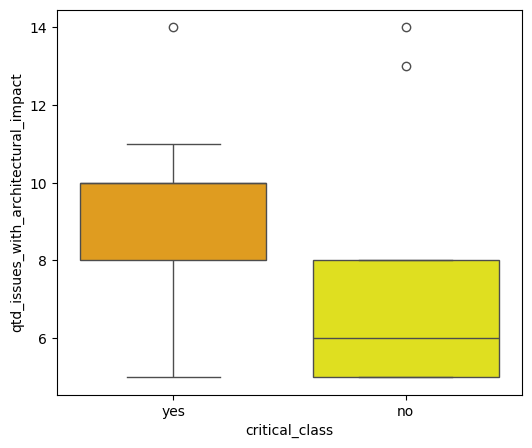

In [29]:
df_new_data2 = pd.read_excel('top20classeskafka2.xlsx')
df_new_data2

plt.figure(figsize=(6,5))
sns.boxplot(x='critical_class', y='qtd_issues_with_architectural_impact', data=df_new_data2, hue="critical_class", legend='auto', palette=['orange', 'yellow'])